# task 1.1

Starting from the "LS vs. ML" notebook in the course' github repository, create another python notebook that implements a scalar quadratic "true model", i.e.,

$$ y_t = \theta_0 + \theta_1 u_t + \theta_2 u_t^2 + e_t . $$ 
         
Let the $u_t$'s be 20 uniformly spaced values in $[-1, 1]$.

In [1]:
# importing the right packages
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# define the function that creates an arbitrary polynomial
# that we will use also to create the scalar quadratic
# 'true model'
#
# note that this function uses both 'lambda functions' and
# the 'enumerate' function -- two features of python
def arbitrary_poly(theta):
    noiseless_y = lambda x: sum([p*(x**i) for i, p in enumerate(theta)])
    return noiseless_y

In [9]:
# for readability
min_u = -1
max_u = 1
N     = 20 # number of samples

# create the u_t's
u = np.linspace(min_u, max_u, N)

# task 1.2

Make the i.i.d. additive noise $e_t$ follow a mixture model, i.e., with probability $\alpha$ be Gaussian (zero mean, $\sigma^2$ variance), and probability $1 - \alpha$ Laplacian (zero mean, scale $\beta$).

In [4]:
# Non-random generation between code executions.
# Comment out if you want to repeat the same experiment over and over again
# np.random.seed(123)

In [11]:
# define the function for the mixture distribution
def noise(alpha, beta, sigma, N):
    if np.random.uniform() < alpha:
        noise = np.random.normal(0, sigma, N)
    else:
        noise = np.random.laplace(0, beta, N)
    return noise

# task 1.3

Code the algorithm for computing the LS estimate assuming that $\alpha$, $\sigma$ and $\beta$ are known, and the Euclidean distance $d$ between the true $\overline{\theta} = \left[ \theta_0, \theta_1, \theta_2 \right]^T$ and the estimated one.

In [51]:
# define the function solving the LS problem asked in the assignment
def LS_solver( u, y, theta_true ):

    # create the features matrix
    U = u[:, np.newaxis] ** np.arange( len(theta_true) )

    # compute the LS estimate by directly solving the normal equations
    theta_hat = np.linalg.solve(U.T @ U, U.T @ y)

    # compute the distance between the LS estimate and the true parameters
    d = np.linalg.norm(theta_true - theta_hat)

    return [theta_hat, d]

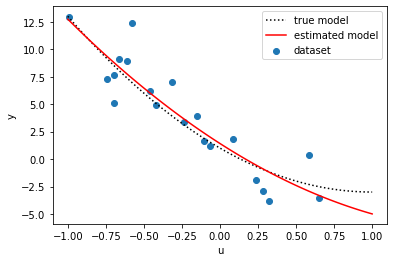

In [49]:
# DEBUG
# check that everything works

# set the parameters
alpha = 0.3
beta  = 1
sigma = 1
theta_true = [1, -8, 4]
    
# create the noisy dataset
noiseless_y = arbitrary_poly(theta_true) # use the lambda function
y = noiseless_y( u ) + noise( alpha, beta, sigma, len(u) )

# solve the LS problem
[theta_hat, d] = LS_solver( u, y, theta_true )

# compute the estimated model
modeled_y = arbitrary_poly(theta_hat) # use the lambda function

# plot the true model against the measurements and the estimated model
x = np.linspace(start = min_u, stop = max_u, num = 100)
plt.figure()
plt.scatter(u, y,                 label = 'dataset')
plt.plot(x, noiseless_y(x), 'k:', label = 'true model')
plt.plot(x, modeled_y(x),   'r',  label = 'estimated model')
plt.xlabel('u')
plt.ylabel('y')
plt.legend();


# task 1.4

Make and comment these plots:

1.4.1) letting $\alpha = 1$, how does $d$ depend on $\sigma$?

1.4.2) letting $\alpha = 0$, how does $d$ depend on $\beta$?

1.4.3) letting $\sigma = \beta = 1$, how does $d$ depend on $\alpha$?

In [57]:
# randomize also on the true models -- storage allocation
n_models = 1000
thetas_true = np.random.normal(0, 1, size = (n_models, 3))

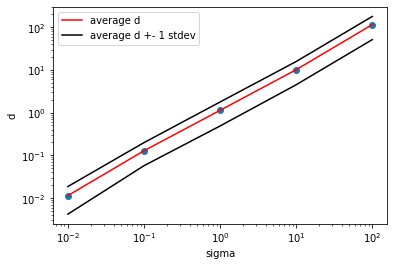

In [47]:
# 1.4.1 - letting $\alpha = 1$, how does $d$ depend on $\sigma$?

# set the fixed parameters
alpha = 1
beta  = 1

# generate all the parameters that shall be checked 
sigmas = np.logspace(-2, 2, 5) # typically better to use logarithmic scales than linear

# storage allocation
ds_sigmas = np.zeros((len(sigmas), n_models))

# cycle on the sigmas
for i, sigma in enumerate(sigmas):
    
    # cycle on the true models
    for j, theta_true in enumerate(thetas_true):
        
        # generate the dataset
        noiseless_y = arbitrary_poly(theta_true) # use the lambda function
        y = noiseless_y( u ) + noise( alpha, beta, sigma, len(u) )

        # solve the LS problem
        [theta_hat, d] = LS_solver( u, y, theta_true )
        
        # save the computed distance
        ds_sigmas[i,j] = d
                
        # print debug info
#        print('sigma:      ', sigma)
#        print('j:          ', j)
#        print('theta_true: ', theta_true)
#        print('theta_hat:  ', theta_hat)
#        print('d:          ', d, '\n')

# plot the true model against the measurements and the estimated model
plt.figure()
plt.plot(sigmas, np.mean(ds_sigmas, axis = 1), 'r', label = 'average d')
plt.plot(sigmas, np.mean(ds_sigmas, axis = 1) + np.std(ds_sigmas, axis = 1), 'k', label = 'average d +- 1 stdev')
plt.plot(sigmas, np.mean(ds_sigmas, axis = 1) - np.std(ds_sigmas, axis = 1), 'k')
plt.scatter(sigmas, np.mean(ds_sigmas, axis = 1))
plt.xlabel('sigma')
plt.ylabel('d')
plt.xscale('log')
plt.yscale('log')
plt.legend();


## comments to 1.4.1

The distance $d$ grows linearly with $\sigma$, as expected. The same can be said about the standard deviations of $d$, the latter thought as a random variable when doing a Monte Carlo - like simulation on the true parameters.

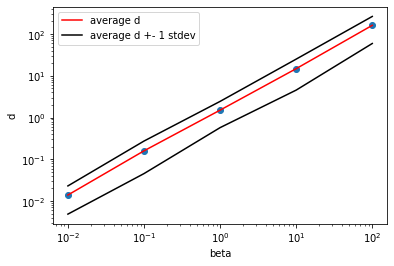

In [48]:
# 1.4.2 - letting $\alpha = 0$, how does $d$ depend on $\beta$?

# set the fixed parameters
alpha = 0
sigma = 1

# generate all the parameters that shall be checked 
betas = np.logspace(-2, 2, 5) # typically better to use logarithmic scales than linear

# storage allocation
ds_betas = np.zeros((len(betas), n_models))

# cycle on the sigmas
for i, beta in enumerate(betas):
    
    # cycle on the true models
    for j, theta_true in enumerate(thetas_true):
        
        # generate the dataset
        noiseless_y = arbitrary_poly(theta_true) # use the lambda function
        y = noiseless_y( u ) + noise( alpha, beta, sigma, len(u) )

        # solve the LS problem
        [theta_hat, d] = LS_solver( u, y, theta_true )
        
        # save the computed distance
        ds_betas[i,j] = d
                
        # print debug info
#        print('beta:       ', beta)
#        print('j:          ', j)
#        print('theta_true: ', theta_true)
#        print('theta_hat:  ', theta_hat)
#        print('d:          ', d, '\n')

# plot the true model against the measurements and the estimated model
plt.figure()
plt.plot(betas, np.mean(ds_betas, axis = 1), 'r', label = 'average d')
plt.plot(betas, np.mean(ds_betas, axis = 1) + np.std(ds_betas, axis = 1), 'k', label = 'average d +- 1 stdev')
plt.plot(betas, np.mean(ds_betas, axis = 1) - np.std(ds_betas, axis = 1), 'k')
plt.scatter(betas, np.mean(ds_betas, axis = 1))
plt.xlabel('beta')
plt.ylabel('d')
plt.xscale('log')
plt.yscale('log')
plt.legend();

## comments to 1.4.2

The distance $d$ grows linearly with $\beta$ as for 1.4.1, as expected.

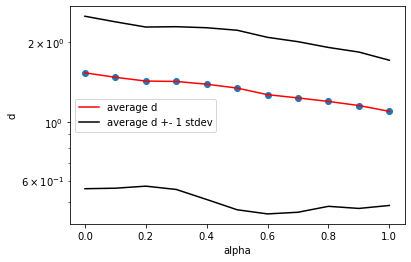

In [60]:
# 1.4.3 - letting $\sigma = \beta = 1$, how does $d$ depend on $\alpha$?

# set the fixed parameters
beta = 1
sigma = 1

# generate all the parameters that shall be checked 
alphas = np.linspace(0, 1, 11) # here instead better to use a linear scale

# storage allocation
ds_alphas = np.zeros((len(alphas), n_models))

# cycle on the sigmas
for i, alpha in enumerate(alphas):
    
    # cycle on the true models
    for j, theta_true in enumerate(thetas_true):
        
        # generate the dataset
        noiseless_y = arbitrary_poly(theta_true) # use the lambda function
        y = noiseless_y( u ) + noise( alpha, beta, sigma, len(u) )

        # solve the LS problem
        [theta_hat, d] = LS_solver( u, y, theta_true )
        
        # save the computed distance
        ds_alphas[i,j] = d
                
        # print debug info
#        print('alpha:      ', alpha)
#        print('j:          ', j)
#        print('theta_true: ', theta_true)
#        print('theta_hat:  ', theta_hat)
#        print('d:          ', d, '\n')

# plot the true model against the measurements and the estimated model
plt.figure()
plt.plot(alphas, np.mean(ds_alphas, axis = 1), 'r', label = 'average d')
plt.plot(alphas, np.mean(ds_alphas, axis = 1) + np.std(ds_alphas, axis = 1), 'k', label = 'average d +- 1 stdev')
plt.plot(alphas, np.mean(ds_alphas, axis = 1) - np.std(ds_alphas, axis = 1), 'k')
plt.scatter(alphas, np.mean(ds_alphas, axis = 1))
plt.xlabel('alpha')
plt.ylabel('d')
plt.yscale('log')
plt.legend();

## comments to 1.4.3

The average distance $d$ seems to improve a bit when passing from the case 'pure Laplacian' (for $\alpha = 0$) to the case 'pure Gaussian' (for $\alpha = 1$). This mimicks the consideration that LS should ideally perform better when the measurement noises are Gaussian. However this conclusion CANNOT be drawn from this plot, since the actual performance depend on the values of $\sigma$ and $\beta$, as saw in the previous two plots.